In [74]:
from collections import OrderedDict
import csv
from gensim import corpora, models
import matplotlib.pyplot as plt
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import numpy as np
import pandas as pd
from pprint import pprint
import pymc as pm
from sklearn.feature_extraction.text import TfidfVectorizer
from stop_words import get_stop_words

## Data Formatting

In [3]:
pre_df = pd.read_csv('../data/Top_Traversals_demo-1daybehavior_20140401.csv', header=1)

paths = np.array([ 'Path'])
for row_ind in range(2, len(pre_df)-400000):
    path = list(str(pre_df.iloc[row_ind, :]).split())[1]
    paths = np.vstack((paths, path))
    
paths = paths[1:]
for journey in range(len(paths)):
    paths[journey] = paths[journey][0].replace('->', ' ')
    
print paths

/Users/Trent/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[['journey.entry web.entry webevent.login webe...']
 ['journey.entry web.entry webevent.login webe...']
 ['journey.entry web.entry webevent.login webe...']
 ..., 
 ['journey.entry mobile.entry mobileevent.login...']
 ['journey.entry mobile.entry mobileevent.login...']
 ['journey.entry mobile.entry mobileevent.login...']]


In [4]:
paths = np.transpose(paths)
print paths

[['journey.entry web.entry webevent.login webe...'
  'journey.entry web.entry webevent.login webe...'
  'journey.entry web.entry webevent.login webe...' ...,
  'journey.entry mobile.entry mobileevent.login...'
  'journey.entry mobile.entry mobileevent.login...'
  'journey.entry mobile.entry mobileevent.login...']]


In [27]:
words = []
for val in paths:
    for string in val:
        word_list = string.split()
        #treat journey.entry as stopword
        words.append(string.split()[1:-1])
        
#commented out function only words for 1d data       
# unique_words = list(OrderedDict.fromkeys(unique_words).keys())
# print unique_words
print words

[['web.entry', 'webevent.login'], ['web.entry', 'webevent.login'], ['web.entry', 'webevent.login'], ['declined'], ['ivr.entry'], ['mobile.entry'], ['web.entry', 'web.exit'], ['mobile.entry'], ['ivr.entry'], ['mobile.entry'], ['agent.entry', 'agent.exit'], ['mobile.entry'], ['web.entry', 'webevent.login'], ['web.entry', 'webevent.login'], ['alerts.delivered'], ['web.entry', 'webevent.login'], ['mobile.entry'], ['mobile.entry'], ['web.entry', 'webevent.login'], ['web.entry', 'webevent.login'], ['web.entry'], ['web.entry', 'web.exit'], ['web.entry', 'webevent.login'], ['web.entry', 'webevent.login'], ['web.entry', 'webevent.login'], ['declined', 'declined'], ['web.entry', 'webevent.login'], ['chordiant'], ['web.entry', 'webevent.login'], ['web.entry', 'webevent.login'], ['web.entry'], [], ['ivr.entry', 'ivr.activation'], ['web.entry', 'webevent.login'], ['mobile.entry'], ['agent.entry', 'agent.exit'], ['web.entry'], ['mobile.entry'], ['mobile.entry'], ['web.entry', 'web.exit'], ['mobile.e

## Getting Data Ready for Gensim Model

In [28]:
dictionary = corpora.Dictionary(unique_words)
print dictionary

Dictionary(277 unique tokens: [u'mobile.entr...', u'webevent....', u'webstc.browse', u'tsys.account', u'ivr.entry']...)


In [29]:
corpus = [dictionary.doc2bow(text) for text in words]
print corpus

[[(2, 1), (3, 1)], [(2, 1), (3, 1)], [(2, 1), (3, 1)], [(4, 1)], [(7, 1)], [(8, 1)], [(2, 1), (10, 1)], [(8, 1)], [(7, 1)], [(8, 1)], [(12, 1), (13, 1)], [(8, 1)], [(2, 1), (3, 1)], [(2, 1), (3, 1)], [(14, 1)], [(2, 1), (3, 1)], [(8, 1)], [(8, 1)], [(2, 1), (3, 1)], [(2, 1), (3, 1)], [(2, 1)], [(2, 1), (10, 1)], [(2, 1), (3, 1)], [(2, 1), (3, 1)], [(2, 1), (3, 1)], [(4, 2)], [(2, 1), (3, 1)], [(17, 1)], [(2, 1), (3, 1)], [(2, 1), (3, 1)], [(2, 1)], [], [(7, 1), (21, 1)], [(2, 1), (3, 1)], [(8, 1)], [(12, 1), (13, 1)], [(2, 1)], [(8, 1)], [(8, 1)], [(2, 1), (10, 1)], [(8, 1)], [(2, 1), (3, 1)], [(2, 1)], [(2, 1), (3, 1)], [(2, 1), (3, 1)], [(2, 1)], [(2, 1), (3, 1)], [(7, 1)], [(8, 1)], [], [(8, 1)], [(26, 1)], [(7, 1)], [(8, 1)], [(2, 1), (3, 1)], [(2, 1)], [(8, 1)], [(7, 1)], [(8, 1)], [(7, 1), (21, 1)], [(2, 1), (3, 1)], [(8, 1)], [(2, 1), (3, 1)], [], [(2, 1), (3, 1)], [(8, 1)], [(2, 1), (3, 1)], [(8, 1)], [(2, 1), (3, 1)], [(2, 1), (3, 1)], [(2, 1), (3, 1)], [], [(2, 1), (3, 1)], [

## Gensim Model Output

In [30]:
ldamodel = models.ldamodel.LdaModel(corpus, num_topics=10, id2word = dictionary, passes=20)
print ldamodel.print_topics(num_topics=10, num_words=10)

[(0, u'0.454*agent.entry + 0.454*agent.exit + 0.004*ivr.rewards + 0.001*complaintstier3.case_received + 0.000*ivr.entry + 0.000*mobile.entry + 0.000*complaintstier3.case_closed + 0.000*webstc.search + 0.000*webstc.dispute + 0.000*web.entry'), (1, u'0.998*mobile.entry + 0.000*mblstc.error + 0.000*mobile.exit + 0.000*reward + 0.000*web.entry + 0.000*declined + 0.000*chordiant + 0.000*agent.entry + 0.000*ivr.entry + 0.000*ivr.rewards'), (2, u'0.384*chordiant + 0.223*mblstc.error + 0.179*web.entry + 0.124*webstc.error + 0.034*tsys.chargeback + 0.010*tsys.ssas + 0.001*ivr.clip + 0.000*complaintstier3.case_closed + 0.000*mobile.entry + 0.000*agent.entry'), (3, u'0.968*agent.entry + 0.009*marketing + 0.002*tsys.correspondence + 0.001*webstc.search + 0.001*webstc.dispute + 0.001*agent.error + 0.001*mobile.exit + 0.001*webstc.help + 0.000*tsys.language + 0.000*ivr.entry'), (4, u'0.981*ivr.entry + 0.005*ivr.fraud + 0.001*ivr.privacy + 0.001*ivr.exit + 0.000*tsys.collections + 0.000*ivr.rewards +

## Visualizing output

In [56]:
topics_list = ldamodel.print_topics(num_topics=10, num_words = 5)
num_vals = []
name_vals = []
for idx, topic in enumerate(topics_list):
    topic_split = topic[1].split('*')
    num_vals.append([topic_split[0]])
    name_vals.append([])
    for word_num in topic_split[1:]:
        word_num =  word_num.split('+')
        if len(word_num) > 1:
            num_vals[idx].append(word_num[1])
        name_vals[idx].append(word_num[0])

print num_vals
print '\n\n'
print name_vals   

[[u'0.454', u' 0.454', u' 0.004', u' 0.001', u' 0.000'], [u'0.998', u' 0.000', u' 0.000', u' 0.000', u' 0.000'], [u'0.384', u' 0.223', u' 0.179', u' 0.124', u' 0.034'], [u'0.968', u' 0.009', u' 0.002', u' 0.001', u' 0.001'], [u'0.981', u' 0.005', u' 0.001', u' 0.001', u' 0.000'], [u'0.499', u' 0.498', u' 0.001', u' 0.000', u' 0.000'], [u'0.452', u' 0.419', u' 0.087', u' 0.000', u' 0.000'], [u'0.825', u' 0.161', u' 0.006', u' 0.000', u' 0.000'], [u'0.743', u' 0.210', u' 0.017', u' 0.000', u' 0.000'], [u'0.500', u' 0.332', u' 0.150', u' 0.000', u' 0.000']]



[[u'agent.entry ', u'agent.exit ', u'ivr.rewards ', u'complaintstier3.case_received ', u'ivr.entry'], [u'mobile.entry ', u'mblstc.error ', u'mobile.exit ', u'reward ', u'web.entry'], [u'chordiant ', u'mblstc.error ', u'web.entry ', u'webstc.error ', u'tsys.chargeback'], [u'agent.entry ', u'marketing ', u'tsys.correspondence ', u'webstc.search ', u'webstc.dispute'], [u'ivr.entry ', u'ivr.fraud ', u'ivr.privacy ', u'ivr.exit ', u'tsys

In [71]:
ten_themes = pd.DataFrame()
for i in range(10):
    new_df = pd.Series([name_vals[i][0], num_vals[i][0],\
                      name_vals[i][1], num_vals[i][1], \
                      name_vals[i][2], num_vals[i][2],\
                      name_vals[i][3], num_vals[i][3],\
                      name_vals[i][4], num_vals[i][4]])
    
    ten_themes = ten_themes.append(new_df, ignore_index = True)
    
ten_themes.columns = ['Word 1', 'Word 1 Value', 'Word 2', 'Word 2 Value', 'Word 3', 'Word 3 Value',\
                     'Word 4', 'Word 4 Value', 'Word 5', 'Word 5 Value']

After visualizing the first 5 columns, I found that the first 4 columns are the only columns with nonzero word values

In [73]:
ten_themes.iloc[:, 0:8]

,Word 1,Word 1 Value,Word 2,Word 2 Value,Word 3,Word 3 Value,Word 4,Word 4 Value
0,agent.entry,0.454,agent.exit,0.454,ivr.rewards,0.004,complaintstier3.case_received,0.001
1,mobile.entry,0.998,mblstc.error,0.000,mobile.exit,0.000,reward,0.000
2,chordiant,0.384,mblstc.error,0.223,web.entry,0.179,webstc.error,0.124
3,agent.entry,0.968,marketing,0.009,tsys.correspondence,0.002,webstc.search,0.001
4,ivr.entry,0.981,ivr.fraud,0.005,ivr.privacy,0.001,ivr.exit,0.001
5,web.entry,0.499,webevent.login,0.498,webstc.faq,0.001,ivr.rewards,0.000
6,web.entry,0.452,webstc.activation,0.419,alerts.delivered,0.087,chordiant,0.000
7,web.entry,0.825,web.exit,0.161,webstc.chat-reject,0.006,webstc.search,0.000
8,declined,0.743,web.entry,0.210,webstc.chat-ignore,0.017,tsys.collections,0.000
9,reward,0.500,web.entry,0.332,ivr.activation,0.150,ivr.entry,0.000


In [115]:
def graph_term_import(df_row, theme_num):
    x = [df_row[i*2] for i in range(4)]
    y = [df_row[i*2+1] for i in range(4)]
    x_pos = np.arange(4)
    fig = plt.figure(figsize = (10, 5))
    ax = fig.add_subplot(111)
    ax.barh(x_pos, y, align='center', alpha=0.4)
    ax.set_yticks(x_pos)
    ax.set_yticklabels(x)
    ax.set_xlabel('Correlation')
    ax.set_ylabel('Terms')
    ax.set_title('Theme {}'.format(theme_num))
    plt.show()

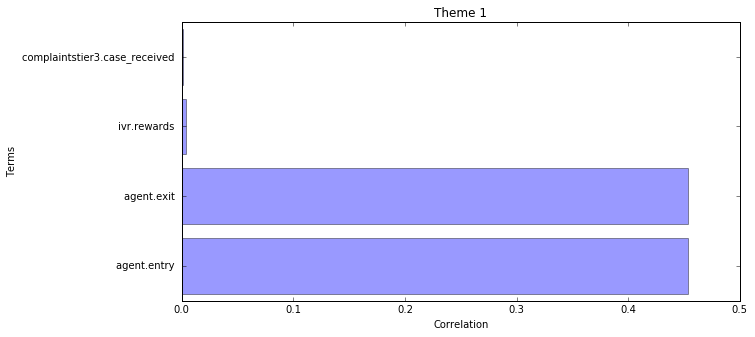

In [116]:
graph_term_import(ten_themes.iloc[0, :], 1)

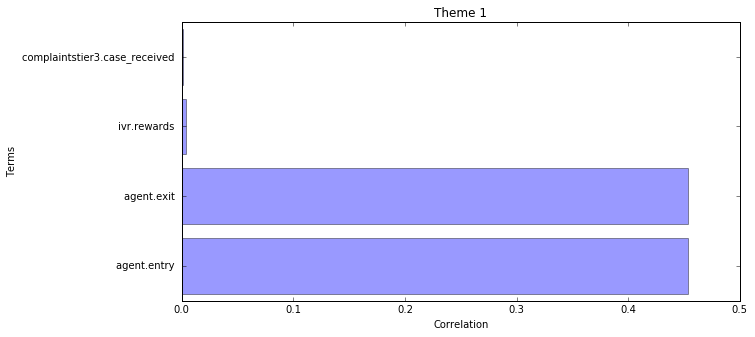

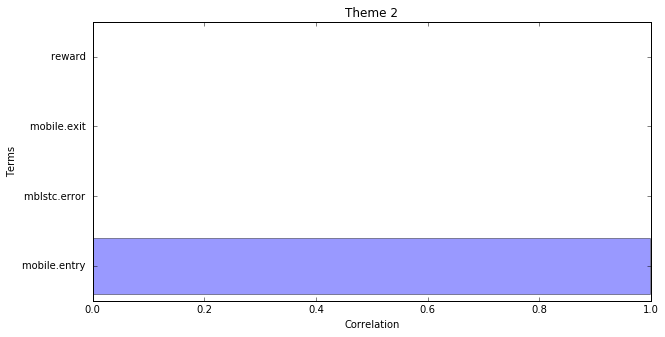

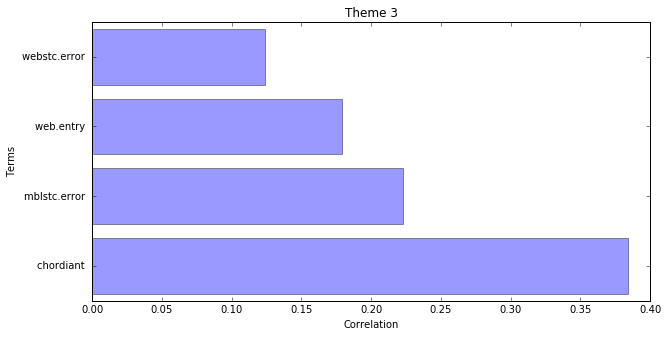

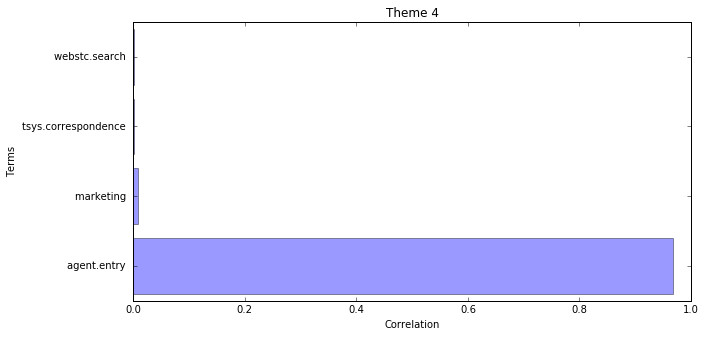

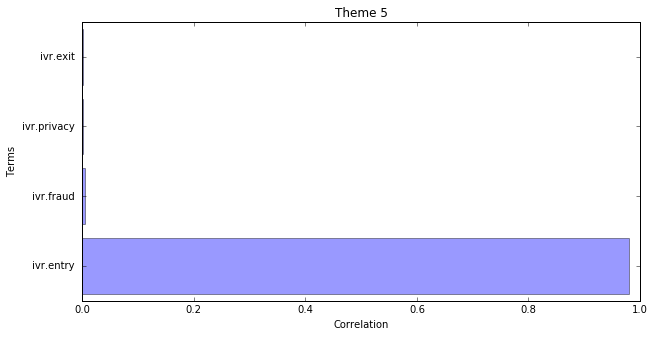

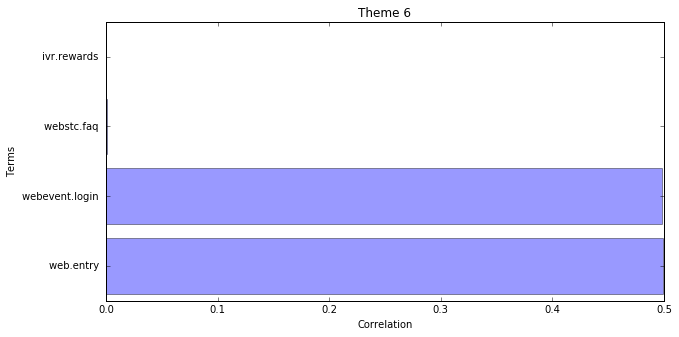

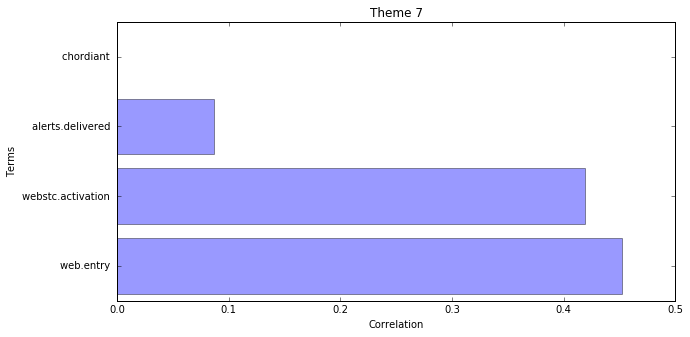

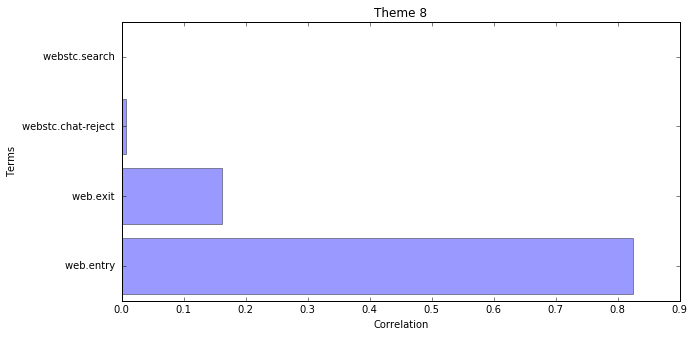

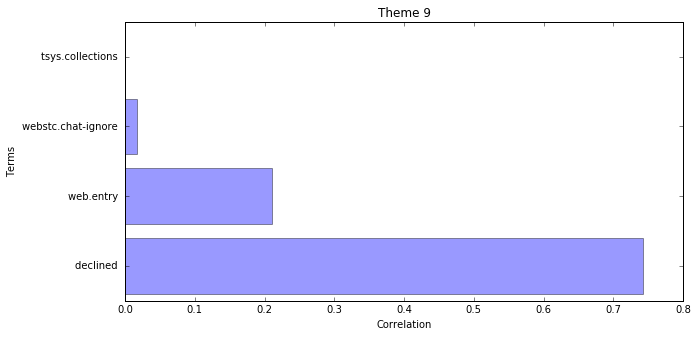

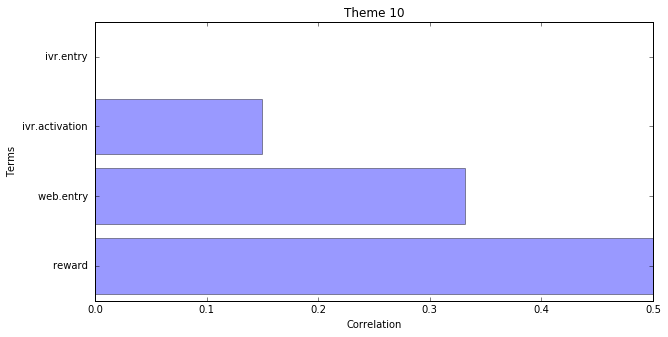

In [117]:
for i in range(10):
    graph_term_import(ten_themes.iloc[i, :], i+1)